# 4 Maximum Aposteriori Estimation

Report of <br>
Jonas Ortner: 2265527 <br>
Marmee Pandya: 1963521

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%load_ext autoreload
%autoreload 2

from a02_helper import *
from a02_functions import l, l_l2, dl_l2, gd, gd_l2, logsigma, classify, optimize

from sklearn.preprocessing import StandardScaler
import pandas as  pd 

## 4a Gradient Descent

Implement the function returning the log-density of the posterior of logistic
regression, regularized with parameter lambda, in `a02_functions.py`. Then test it
below.

In [2]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.64166782574, -47312.62381068288]

Now implement the function to obtain its gradient and test it, in the same manner as
above.

In [3]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

Now define the (f,update) tuple handed to the `optimize` function for gradient descent
on logistic regression with L2 regularization. Then run it below.

In [4]:
# let's run!
lambda_ = 100
w0 = np.random.normal(size=D)
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  7159.877, eps=0.010000000
Epoch   1: f= 16414.030, eps=0.005000000
Epoch   2: f=  3756.368, eps=0.005250000
Epoch   3: f=  1310.198, eps=0.005512500
Epoch   4: f=  1149.990, eps=0.005788125
Epoch   5: f=  1605.227, eps=0.002894063
Epoch   6: f=  1498.673, eps=0.003038766
Epoch   7: f=  1039.586, eps=0.003190704
Epoch   8: f=  1027.892, eps=0.003350239
Epoch   9: f=  1046.823, eps=0.001675120
Epoch  10: f=   996.131, eps=0.001758876
Epoch  11: f=   988.957, eps=0.001846819
Epoch  12: f=   988.582, eps=0.001939160
Epoch  13: f=   988.531, eps=0.002036118
Epoch  14: f=   988.519, eps=0.002137924
Epoch  15: f=   988.515, eps=0.002244820
Epoch  16: f=   988.513, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.001504137
Epoch  23: f=   988.512, eps=0.001579344
Epoch  24: f=   

## 4b Effect of Prior

In [5]:
# %% [markdown]
# ## 4b Effect of Prior

# %%
# YOUR CODE HERE
# Compare training/test log-likelihood and accuracy for different lambda values
# Parameters
lambdas = [0, 5, 10, 50, 100, 200, 500, 1000]
nepochs = 300
eps0_init = 1e-3
max_retries = 3
use_zero_init = True  # for fair comparisons

# Prepare scaled features (safe even if Xz already z-scored)
scaler = StandardScaler()
Xz_scaled = scaler.fit_transform(Xz)
Xtestz_scaled = scaler.transform(Xtestz)

# Storage
rows = []
results = []  # keep small result dicts for later use (4c can reuse if desired)

for lam in lambdas:
    print(f"\nRunning lambda = {lam}")
    if use_zero_init:
        w0 = np.zeros(Xz_scaled.shape[1])
    else:
        w0 = np.random.normal(size=Xz_scaled.shape[1])

    eps_try = eps0_init
    success = False
    for attempt in range(max_retries):
        print(f" attempt {attempt+1} with eps0={eps_try:.1e} ... ", end="", flush=True)
        try:
            w_map, vals_map, eps_map = optimize(gd_l2(y, Xz_scaled, lam), w0, nepochs=nepochs, eps0=eps_try, verbose=False)
        except Exception as e:
            print(f"exception: {e}. reduce eps and retry.")
            eps_try *= 0.1
            continue

        if np.any(np.isnan(vals_map)) or np.any(np.isnan(w_map)):
            print("FAILED (nan). Reducing eps and retrying.")
            eps_try *= 0.1
            continue

        print("OK")
        success = True
        break

    if not success:
        print(f" All retries failed for lambda={lam}. Marking as failed.")
        rows.append({"lambda": lam, "train_ll": np.nan, "test_ll": np.nan, "train_acc": np.nan, "test_acc": np.nan})
        results.append({"lambda": lam, "w": None, "objective": None, "eps": None})
        continue

    # compute plain data log-likelihoods (no prior) and accuracies
    tr_ll = l(y, Xz_scaled, w_map)
    te_ll = l(ytest, Xtestz_scaled, w_map)
    ypred_tr = classify(Xz_scaled, w_map)
    ypred_te = classify(Xtestz_scaled, w_map)
    tr_acc = np.mean(ypred_tr == y)
    te_acc = np.mean(ypred_te == ytest)

    rows.append({"lambda": lam, "train_ll": tr_ll, "test_ll": te_ll, "train_acc": tr_acc, "test_acc": te_acc})
    results.append({"lambda": lam, "w": w_map, "objective": vals_map, "eps": eps_map})


Running lambda = 0
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 5
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 10
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 50
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 100
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 200
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 500
 attempt 1 with eps0=1.0e-03 ... OK

Running lambda = 1000
 attempt 1 with eps0=1.0e-03 ... OK


In [6]:
# Summary DataFrame
df = pd.DataFrame(rows).set_index("lambda")
pd.set_option("display.float_format", "{: .4f}".format)
print("\nSummary (data log-likelihood and accuracies):")
display(df)


Summary (data log-likelihood and accuracies):


,train_ll,test_ll,train_acc,test_acc
lambda,,,,
0,-661.5186,-430.3692,0.9214,0.9173
5,-684.1570,-435.0073,0.9204,0.9199
10,-698.4214,-436.3227,0.9214,0.9199
50,-772.8450,-455.4549,0.9194,0.9180
100,-833.0105,-476.7408,0.9155,0.9167
200,-917.1361,-509.5574,0.9155,0.9115
500,-1072.2064,-573.8156,0.9126,0.9076
1000,-1224.7230,-639.6407,0.9106,0.9004


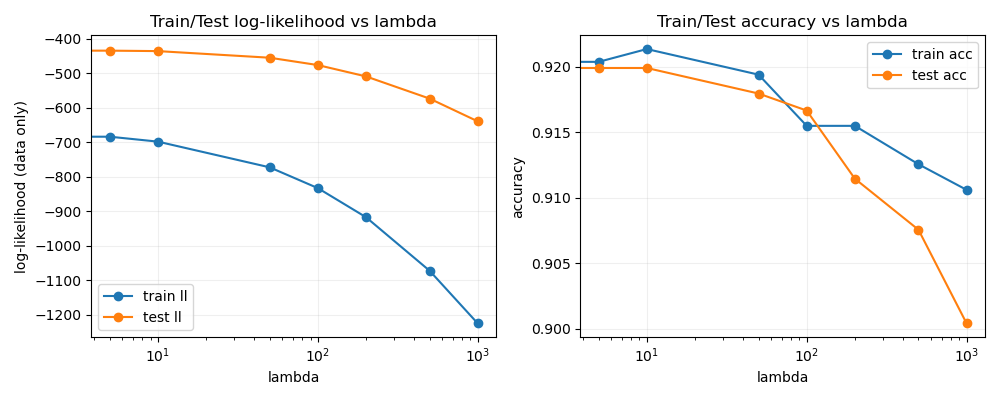

In [7]:
# Plot plain train/test log-likelihood (no prior)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df.index, df["train_ll"], marker='o', label="train ll")
plt.plot(df.index, df["test_ll"], marker='o', label="test ll")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("log-likelihood (data only)")
plt.title("Train/Test log-likelihood vs lambda")
plt.legend()
plt.grid(alpha=0.2)

# Plot accuracies
plt.subplot(1,2,2)
plt.plot(df.index, df["train_acc"], marker='o', label="train acc")
plt.plot(df.index, df["test_acc"], marker='o', label="test acc")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.title("Train/Test accuracy vs lambda")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

## 4c Composition of Weight Vector

In [8]:
# %%
# YOUR CODE HERE
# PARAMETERS
try:
    results  # noqa: F821
except NameError:
    # Recompute (same safe logic as in 4b but shorter)
    results = []
    scaler = StandardScaler()
    Xz_scaled = scaler.fit_transform(Xz)
    for lam in lambdas:
        w0 = np.zeros(Xz_scaled.shape[1])
        eps_try = eps0_init
        success = False
        for attempt in range(max_retries):
            try:
                w_map, vals_map, eps_map = optimize(gd_l2(y, Xz_scaled, lam), w0, nepochs=nepochs, eps0=eps_try, verbose=False)
            except Exception:
                eps_try *= 0.1
                continue
            if np.any(np.isnan(w_map)) or np.any(np.isnan(vals_map)):
                eps_try *= 0.1
                continue
            success = True
            break
        if not success:
            results.append({"lambda": lam, "w": None, "objective": None, "eps": None})
        else:
            results.append({"lambda": lam, "w": w_map, "objective": vals_map, "eps": eps_map})

In [9]:
# Parameters for display
k = 12  # top-k per lambda to consider
union_idx = set()
for r in results:
    if r["w"] is None:
        continue
    order = np.argsort(np.abs(r["w"]))[::-1][:k]
    union_idx.update(order)
union_idx = sorted(list(union_idx))
if len(union_idx) == 0:
    raise RuntimeError("No successful runs to inspect. Try lowering eps0 or lambdas list.")

feat_names = [features[i] for i in union_idx]

# Build DataFrame (rows = features, cols = lambdas)
df_plot = pd.DataFrame(index=feat_names, columns=[f"λ={r['lambda']}" for r in results], dtype=float)
for r in results:
    lam = r["lambda"]
    col = f"λ={lam}"
    if r["w"] is None:
        df_plot[col] = np.nan
    else:
        df_plot[col] = [r["w"][i] for i in union_idx]

In [10]:
pd.set_option("display.float_format", "{: .4f}".format)
print("\nTop features (union across lambdas) — numeric table:")
display(df_plot)


Top features (union across lambdas) — numeric table:


,λ=0,λ=5,λ=10,λ=50,λ=100,λ=200,λ=500,λ=1000
word_freq_3d,4.8299,0.7814,0.5049,0.1973,0.1359,0.0967,0.0613,0.0418
word_freq_our,0.2595,0.2624,0.2633,0.2531,0.2365,0.2104,0.1640,0.1248
word_freq_remove,1.1758,1.1353,1.0718,0.7876,0.6324,0.4828,0.3150,0.2166
word_freq_internet,0.2912,0.3080,0.3124,0.2985,0.2723,0.2316,0.1657,0.1183
word_freq_addresses,0.5172,0.4930,0.4533,0.3084,0.2404,0.1803,0.1198,0.0871
word_freq_free,0.8470,0.8176,0.7870,0.6436,0.5482,0.4409,0.3018,0.2119
word_freq_business,0.5697,0.5135,0.4836,0.3869,0.3319,0.2706,0.1902,0.1375
word_freq_your,0.2156,0.2328,0.2430,0.2715,0.2781,0.2726,0.2364,0.1903
word_freq_font,0.6824,0.5458,0.4756,0.3066,0.2426,0.1854,0.1208,0.0814
word_freq_000,1.5633,1.3370,1.1663,0.7343,0.5680,0.4238,0.2728,0.1884


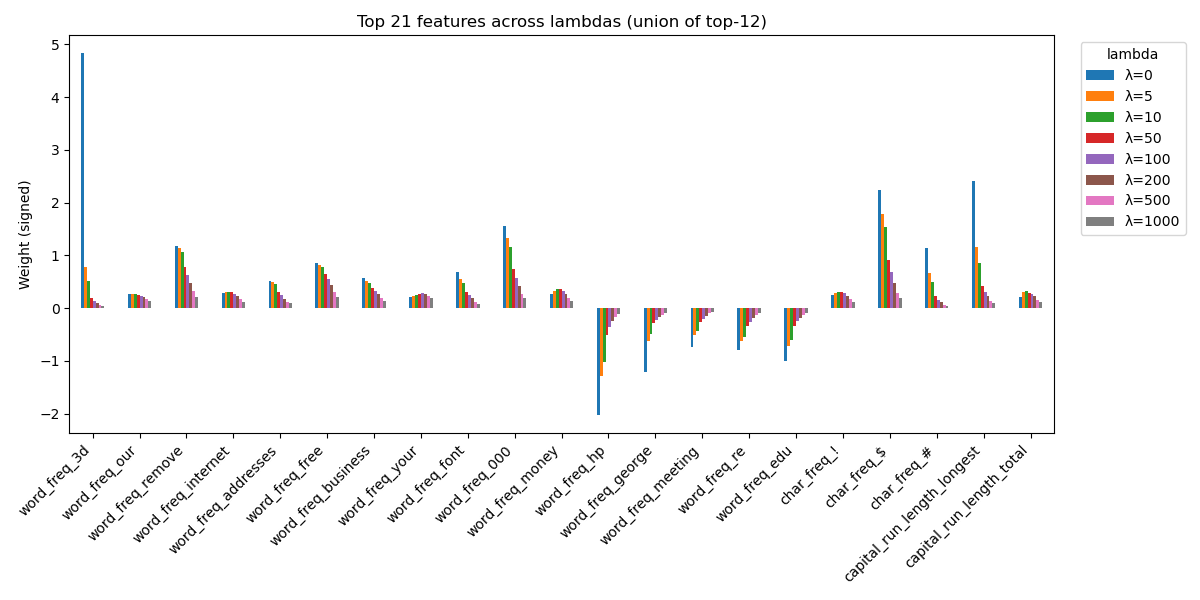

In [11]:
# Plot grouped bar chart for the union-top features
ax = df_plot.plot(kind="bar", figsize=(12, 6))
ax.set_ylabel("Weight (signed)")
ax.set_title(f"Top {len(feat_names)} features across lambdas (union of top-{k})")
plt.xticks(rotation=45, ha="right")
plt.legend(title="lambda", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [12]:
# print textual top-10 for smallest and largest successful lambda
successful = [r for r in results if r["w"] is not None]
if successful:
    lam_small = successful[0]["lambda"]
    lam_large = successful[-1]["lambda"]
    w_small = successful[0]["w"]
    w_large = successful[-1]["w"]
    print(f"\nTop 10 features for lambda={lam_small}:")
    for idx in np.argsort(np.abs(w_small))[::-1][:10]:
        print(f"  {features[idx]:30s} {w_small[idx]: .4f}")
    print(f"\nTop 10 features for lambda={lam_large}:")
    for idx in np.argsort(np.abs(w_large))[::-1][:10]:
        print(f"  {features[idx]:30s} {w_large[idx]: .4f}")


Top 10 features for lambda=0:
  word_freq_3d                    4.8299
  capital_run_length_longest      2.4013
  char_freq_$                     2.2336
  word_freq_hp                   -2.0325
  word_freq_000                   1.5633
  word_freq_george               -1.2220
  word_freq_remove                1.1758
  char_freq_#                     1.1374
  word_freq_edu                  -1.0132
  word_freq_free                  0.8470

Top 10 features for lambda=1000:
  word_freq_remove                0.2166
  word_freq_free                  0.2119
  char_freq_$                     0.1963
  word_freq_your                  0.1903
  word_freq_000                   0.1884
  word_freq_business              0.1375
  word_freq_money                 0.1305
  word_freq_our                   0.1248
  char_freq_!                     0.1219
  capital_run_length_total        0.1184
